In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('LLM09joined_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5098 entries, 0 to 5097
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_x                      5098 non-null   float64
 1   submitter                 5098 non-null   object 
 2   authors_x                 5098 non-null   object 
 3   title                     5098 non-null   object 
 4   comments                  2732 non-null   object 
 5   journal-ref               143 non-null    object 
 6   doi                       176 non-null    object 
 7   report-no                 8 non-null      object 
 8   categories                5098 non-null   object 
 9   license                   5098 non-null   object 
 10  abstract                  5098 non-null   object 
 11  versions                  5098 non-null   object 
 12  update_date               5098 non-null   object 
 13  authors_parsed            5098 non-null   object 
 14  ContainC

In [4]:
df

,id_x,submitter,authors_x,title,comments,journal-ref,doi,report-no,categories,license,...,url,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,fieldsOfStudy,s2FieldsOfStudy,authors_y
0,1902.09097,Joe Booth,"Joe Booth, Jackson Booth",Marathon Environments: Multi-Agent Continuous ...,AAAI-2019 Workshop on Games and Simulations fo...,AAAI-2019 Workshop on Games and Simulations fo...,NaN,NaN,cs.AI cs.LG cs.MA,http://arxiv.org/licenses/nonexclusive-distrib...,...,https://www.semanticscholar.org/paper/52b6d349...,arXiv.org,2019.0,12.0,5.0,0.0,False,['Computer Science'],"[{'category': 'Computer Science', 'source': 'e...","[{'authorId': '37373648', 'name': 'J. Booth'},..."
1,1903.01669,Vijaya Sai Krishna Gottipati,"Sai Krishna, Keehong Seo, Dhaivat Bhatt, Vince...",Deep Active Localization,10 pages,NaN,NaN,NaN,cs.RO cs.AI cs.LG stat.ML,http://creativecommons.org/publicdomain/zero/1.0/,...,https://www.semanticscholar.org/paper/cbe54f8e...,IEEE Robotics and Automation Letters,2019.0,37.0,29.0,0.0,True,"['Engineering', 'Computer Science', 'Mathemati...","[{'category': 'Engineering', 'source': 'extern...","[{'authorId': '1381860090', 'name': 'Sai Krish..."
2,1903.08855,Nelson F. Liu,Nelson F. Liu and Matt Gardner and Yonatan Bel...,Linguistic Knowledge and Transferability of Co...,"22 pages, 4 figures; to appear at NAACL 2019",NaN,NaN,NaN,cs.CL,http://arxiv.org/licenses/nonexclusive-distrib...,...,https://www.semanticscholar.org/paper/f6fbb680...,North American Chapter of the Association for ...,2019.0,83.0,606.0,157.0,True,['Computer Science'],"[{'category': 'Computer Science', 'source': 'e...","[{'authorId': '22243769', 'name': 'Nelson F. L..."
3,1903.09295,'Stephen' Zhen Gou,"Stephen Zhen Gou, Yuyang Liu",DQN with model-based exploration: efficient le...,NaN,NaN,NaN,NaN,cs.LG stat.ML,http://arxiv.org/licenses/nonexclusive-distrib...,...,https://www.semanticscholar.org/paper/5d05577d...,arXiv.org,2019.0,11.0,7.0,2.0,False,"['Computer Science', 'Mathematics']","[{'category': 'Computer Science', 'source': 'e...","[{'authorId': '117387024', 'name': 'Stephen Go..."
4,1903.11437,Franck Burlot,Franck Burlot and Fran\c{c}ois Yvon,Using Monolingual Data in Neural Machine Trans...,Published in the Proceedings of the Third Conf...,NaN,NaN,NaN,cs.CL,http://arxiv.org/licenses/nonexclusive-distrib...,...,https://www.semanticscholar.org/paper/e6deb7f4...,Conference on Machine Translation,2018.0,40.0,85.0,8.0,True,['Computer Science'],"[{'category': 'Computer Science', 'source': 'e...","[{'authorId': '3456893', 'name': 'Franck Burlo..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5093,2310.01432,Zongjie Li,"Zongjie Li, Chaozheng Wang, Pingchuan Ma, Daoy...",Split and Merge: Aligning Position Biases in L...,NaN,NaN,NaN,NaN,cs.CL cs.AI,http://arxiv.org/licenses/nonexclusive-distrib...,...,https://www.semanticscholar.org/paper/2e0f66e6...,arXiv.org,2023.0,41.0,0.0,0.0,True,['Computer Science'],"[{'category': 'Computer Science', 'source': 'e...","[{'authorId': '2118207559', 'name': 'Zongjie L..."
5094,2310.01434,Tom\'as Marques,"Samuel Carreira, Tom\'as Marques, Jos\'e Ribei...",Revolutionizing Mobile Interaction: Enabling a...,NaN,NaN,NaN,NaN,cs.CL cs.AI cs.LG,http://arxiv.org/licenses/nonexclusive-distrib...,...,https://www.semanticscholar.org/paper/e2204895...,arXiv.org,2023.0,13.0,0.0,0.0,True,['Computer Science'],"[{'category': 'Computer Science', 'source': 'e...","[{'authorId': '2253468900', 'name': 'Samuel Ca..."
5095,2310.01436,Yang Gao,"Haishuai Wang, Yang Gao, Xin Zheng, Peng Zhang...",Graph Neural Architecture Search with GPT-4,NaN,NaN,NaN,NaN,cs.LG cs.AI,http://arxiv.org/licenses/nonexclusive-distrib...,...,https://www.semanticscholar.org/paper/0b8265a6...,arXiv.org,2023.0,29.0,0.0,0.0,True,['Computer Science'],"[{'category': 'Computer Science', 'source': 'e...","[{'authorId': '2238917689', 'name': 'Haishuai ..."
5096,2310.01441,Hejia Geng,"Hejia Geng, Boxun Xu, Peng Li",

# categories and field

## number of category

In [5]:
# Step 1: Split 'categories' into separate rows
df_categories = df['categories'].str.split(' ', expand=True).stack().reset_index(level=1, drop=True).rename('category')

# Step 2: Count the number of occurrences for each category
category_counts = df_categories.value_counts()

# Convert to DataFrame for better visualization
df_category_counts = category_counts.reset_index()
df_category_counts.columns = ['Category', 'Count']
print(df_category_counts[0:50])

             Category  Count
0               cs.CL   3556
1               cs.AI   2268
2               cs.LG   1646
3               cs.CV    454
4               cs.HC    302
5               cs.CY    293
6               cs.SE    278
7               cs.IR    233
8               cs.CR    160
9               cs.RO    153
10            stat.ML     99
11            eess.AS     89
12              cs.SD     78
13              cs.PL     61
14              cs.DB     51
15              cs.NE     47
16              cs.DC     47
17              cs.MM     40
18              cs.SI     39
19              cs.MA     23
20           q-fin.EC     22
21            econ.GN     22
22              cs.DL     20
23              cs.LO     20
24              cs.NI     17
25            eess.SP     16
26            eess.IV     15
27              cs.SY     15
28              cs.AR     15
29            eess.SY     15
30           q-bio.NC     14
31              cs.CE     14
32           q-bio.QM     14
33      physic

# Average Time Interval (Innovation Speed)

In [6]:
df['versions']

0       [{'version': 'v1', 'created': 'Mon, 25 Feb 201...
1       [{'version': 'v1', 'created': 'Tue, 5 Mar 2019...
2       [{'version': 'v1', 'created': 'Thu, 21 Mar 201...
3       [{'version': 'v1', 'created': 'Fri, 22 Mar 201...
4       [{'version': 'v1', 'created': 'Wed, 27 Mar 201...
                              ...                        
5093    [{'version': 'v1', 'created': 'Fri, 29 Sep 202...
5094    [{'version': 'v1', 'created': 'Fri, 29 Sep 202...
5095    [{'version': 'v1', 'created': 'Sat, 30 Sep 202...
5096    [{'version': 'v1', 'created': 'Sat, 30 Sep 202...
5097    [{'version': 'v1', 'created': 'Fri, 29 Sep 202...
Name: versions, Length: 5098, dtype: object

In [7]:
import pandas as pd
import datetime
import ast

# the original 'versions' column is a string representation of a list of dictionaries, so we need to convert it to a list of dictionaries by using ast.literal_eval
df['versions'] = df['versions'].apply(ast.literal_eval)

def convert_time(lst):
    for d in lst:
        dt = datetime.datetime.strptime(d['created'], '%a, %d %b %Y %H:%M:%S %Z')
        dt = dt.replace(second=0, microsecond=0)
        d['created'] = dt
    return lst

df['versions'] = df['versions'].apply(convert_time)

In [8]:
def get_first_submit_time(lst):
    times = [d['created'] for d in lst]
    return min(times).replace(second=0, microsecond=0)

df['firstSubmitTime'] = df['versions'].apply(get_first_submit_time)

In [9]:
df['firstSubmitTime']

0      2019-02-25 05:56:00
1      2019-03-05 05:00:00
2      2019-03-21 07:19:00
3      2019-03-22 01:41:00
4      2019-03-27 14:11:00
               ...        
5093   2023-09-29 14:38:00
5094   2023-09-29 16:30:00
5095   2023-09-30 08:05:00
5096   2023-09-30 20:18:00
5097   2023-09-29 22:55:00
Name: firstSubmitTime, Length: 5098, dtype: datetime64[ns]

In [10]:
df = df.sort_values('firstSubmitTime')
df['TimeInterval'] = df['firstSubmitTime'].diff().dt.total_seconds() / 3600  # convert to hours
df['Month'] = df['firstSubmitTime'].dt.to_period('M')
ati = df.groupby('Month')['TimeInterval'].mean()

In [11]:
IS = 1/ati

In [12]:
IS

Month
2019-02         NaN
2019-03    0.005493
2019-04    0.006129
2019-05    0.004786
2019-06    0.008874
2019-07    0.006862
2019-08    0.010200
2019-09    0.008719
2019-10    0.010066
2019-11    0.014496
2019-12    0.016976
2020-01    0.005039
2020-02    0.007134
2020-03    0.005961
2020-04    0.024184
2020-05    0.012940
2020-06    0.014437
2020-07    0.010152
2020-08    0.018936
2020-09    0.033541
2020-10    0.041164
2020-11    0.019550
2020-12    0.030887
2021-01    0.019071
2021-02    0.042814
2021-03    0.009750
2021-04    0.047224
2021-05    0.024476
2021-06    0.049010
2021-07    0.024069
2021-08    0.031899
2021-09    0.085626
2021-10    0.054402
2021-11    0.047442
2021-12    0.043903
2022-01    0.045823
2022-02    0.049513
2022-03    0.071022
2022-04    0.069043
2022-05    0.118742
2022-06    0.082799
2022-07    0.061496
2022-08    0.058256
2022-09    0.081101
2022-10    0.185494
2022-11    0.109305
2022-12    0.194638
2023-01    0.127995
2023-02    0.272315
2023-03    0.4

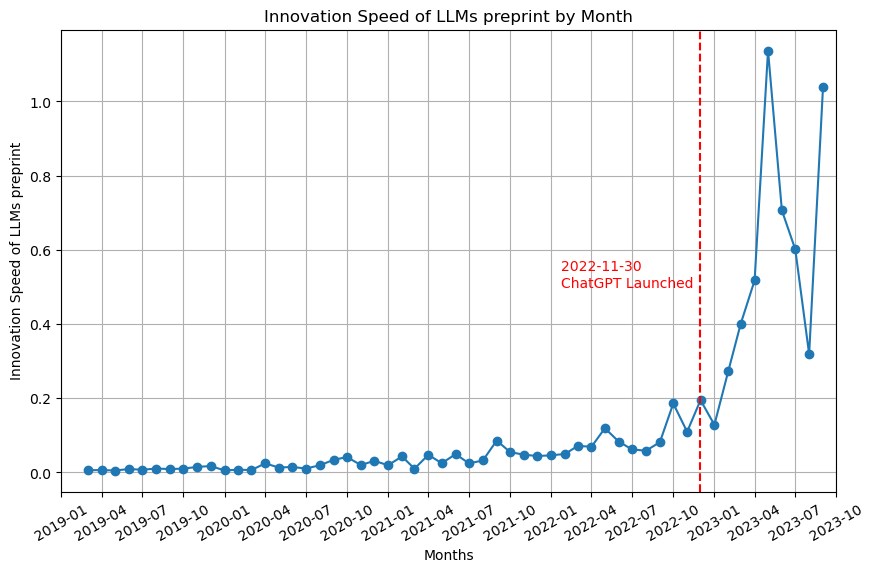

In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(IS.index.to_timestamp(), IS.values, marker='o')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # set x-ticks every 3 months
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # format x-ticks as 'YYYY-MM'
ax.set_xlim([pd.Timestamp('2019-01'), pd.Timestamp('2023-10')])  # set x-axis limits
plt.xticks(rotation=30)
plt.xlabel('Months')
plt.ylabel('Innovation Speed of LLMs preprint')
plt.title('Innovation Speed of LLMs preprint by Month')
plt.grid(True)
ax.axvline(pd.Timestamp('2022-11-30'), color='r', linestyle='--')  # add vertical line
ax.annotate('2022-11-30\nChatGPT Launched', xy=(pd.Timestamp('2022-11-30'), 0.5), xycoords='data', xytext=(-100,0), textcoords='offset points', color='r')  # add annotation
plt.show()

## number of category by month

In [14]:
# Step 1: Merge df_filtered with original DataFrame to get 'firstSubmitTime'
df_merged = df.join(df_filtered, how='inner')

# Step 2: Create new DataFrame with counts of preprints for each category by month
df_counts = df_merged.groupby([df_merged['firstSubmitTime'].dt.to_period('M'), 'category']).size().unstack(fill_value=0)

# Step 3: Plot counts for each category over time
plt.figure(figsize=(10, 6))

# Define the order of the legend
categories = ['cs.CL', 'cs.AI', 'cs.LG', 'cs.CV', 'cs.HC', 'cs.CY', 'cs.SE', 'cs.IR', 'cs.CR', 'cs.RO', 'cs.SD']

# Plot each category in the specified order
for category in categories:
    plt.plot(df_counts.index.to_timestamp(), df_counts[category], marker='', linewidth=1, alpha=0.9, label=category)

# Set x-axis ticks and labels
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # set x-ticks every 3 months
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # format x-ticks as 'YYYY-MM'
plt.xticks(rotation=30)  # rotate x-axis ticks

plt.xlabel('Months')
plt.ylabel('Number of Preprints')
plt.title('Number of Preprints by Category Over Time')
plt.legend(loc='upper left', ncol=2)
plt.grid(True)
plt.show()

NameError: name 'df_filtered' is not defined

## IS of category by month

In [ ]:
df_merged = df_merged.sort_values('firstSubmitTime')

In [ ]:
# Define a function to calculate the time difference
def calculate_diff(group):
    return group.diff().dt.total_seconds() / 3600  # convert to hours

# Apply the function to each ['Month', 'category'] group
df_merged = df_merged.reset_index()
df_merged['MonthGroupTimeInterval'] = df_merged.groupby(['Month', 'category'])['firstSubmitTime'].apply(calculate_diff)
df_merged.set_index('index', inplace=True)

In [ ]:
# df_merged.loc[category == 'cs.CY', month == '2023-09']
df_merged.loc[(df_merged['category'] == 'cs.CY') & (df_merged['Month'] == '2022-03')]

,id_x,submitter,authors_x,title,comments,journal-ref,doi,report-no,categories,license,...,influentialCitationCount,isOpenAccess,fieldsOfStudy,s2FieldsOfStudy,authors_y,firstSubmitTime,TimeInterval,Month,category,MonthGroupTimeInterval
index,,,,,,,,,,,,,,,,,,,,,
664,2203.07504,Robert Wolfe,"Robert Wolfe, Aylin Caliskan",VAST: The Valence-Assessing Semantics Test for...,To be published in AAAI 2022,NaN,NaN,NaN,cs.CL cs.AI cs.CY cs.LG,http://creativecommons.org/licenses/by-nc-sa/4.0/,...,0.0,True,['Computer Science'],"[{'category': 'Computer Science', 'source': 'e...","[{'authorId': '100508901', 'name': 'R. Wolfe'}...",2022-03-14 21:29:00,4.583333,2022-03,cs.CY,NaN
665,2203.07511,Robert Wolfe,"Robert Wolfe, Aylin Caliskan",Contrastive Visual Semantic Pretraining Magnif...,To be published in ACL 2022,NaN,NaN,NaN,cs.CL cs.AI cs.CY cs.LG,http://creativecommons.org/licenses/by-nc-sa/4.0/,...,1.0,True,['Computer Science'],"[{'category': 'Computer Science', 'source': 'e...","[{'authorId': '100508901', 'name': 'R. Wolfe'}...",2022-03-14 21:42:00,0.216667,2022-03,cs.CY,0.216667


In [ ]:
df_merged.groupby(['category','Month'])['MonthGroupTimeInterval'].mean()['cs.CY']

Month
2019-08           NaN
2019-11           NaN
2020-04    285.650000
2020-09           NaN
2021-02           NaN
2021-04           NaN
2021-05           NaN
2021-06    233.400000
2021-07           NaN
2021-08           NaN
2021-09    168.200000
2021-10    212.000000
2021-12           NaN
2022-01           NaN
2022-02    157.044444
2022-03      0.216667
2022-04    156.616667
2022-05    118.820833
2022-06     88.806667
2022-07    429.216667
2022-09    121.395833
2022-10    198.200000
2022-11    189.175000
2022-12     55.407143
2023-01     73.295833
2023-02     57.625000
2023-03     24.153623
2023-04     20.510753
2023-05     15.878986
2023-06     19.820833
2023-07     29.730000
2023-08     30.775000
2023-09     19.072857
Freq: M, Name: MonthGroupTimeInterval, dtype: float64

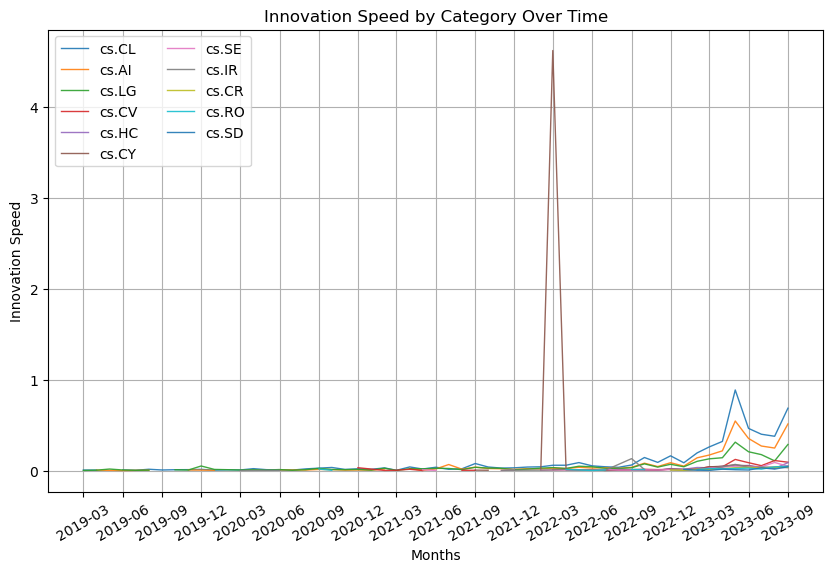

In [ ]:
df_IS = 1/(df_merged.groupby(['category','Month'])['MonthGroupTimeInterval'].mean())
# Step 3: Plot IS for each category over time
plt.figure(figsize=(10, 6))

# Define the order of the legend
categories = ['cs.CL', 'cs.AI', 'cs.LG', 'cs.CV', 'cs.HC', 'cs.CY', 'cs.SE', 'cs.IR', 'cs.CR', 'cs.RO', 'cs.SD']

# Plot each category in the specified order
for category in categories:
    dates = pd.to_datetime(df_IS[category].index.to_timestamp().strftime('%Y-%m'))
    plt.plot(dates, df_IS[category], marker='', linewidth=1, alpha=0.9, label=category)

# Set x-axis ticks and labels
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # set x-ticks every 3 months
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # format x-ticks as 'YYYY-MM'
plt.xticks(rotation=30)  # rotate x-axis ticks

plt.xlabel('Months')
plt.ylabel('Innovation Speed')
plt.title('Innovation Speed by Category Over Time')
plt.legend(loc='upper left', ncol=2)
plt.grid(True)
plt.show()